# 3. Neural networks

In this last notebook we will look into using state-of-the-art models to find the easter eggs. If these models are not able to find them, we'd better call off the search. We will be using neural networks, which are capable of detecting complex objects in complex and diverse environments. A drawback is that they are computationally heavy, not only during inference but especially during training. Another drawback is that training these networks requires large (labelled) datasets.

Luckily for us, we can use the power of open source to make our lives easier. We will be using the `ultralytics`-package, which offers pre-trained models and an easy-to-use Python API.

**[Ultralitics-documentation](https://www.ultralytics.com/)**

In [15]:
from ultralytics import YOLO
import cv2
import sys
from pathlib import Path
from IPython.display import display

project_root = Path().resolve().parent
sys.path.append(str(project_root))

## Object detection with YOLO

There are a lot of really good pre-trained neural networks you can use, one of them is YOLO which stands for you only look once. YOLO11n (nano) is the smallest YOLO model containing "only" 2.6 milion parameters and is therefore considered pretty lightweight, this since YOLO11x (xLarge) contains almost 57 milion parameters.

In this section we start of by using a pre trained yolo11n model and see how good it is at detecting eggs right out of the box.

In [13]:
# Load model
model = YOLO("YOLO11n.pt")  # load a pretrained model

Use the above model to classify egg images in the `3_neural_networks` folder

In [17]:
img = str(project_root / "data" / "3_neural_networks" / "image_01.jpg")
results = model(img)
results[0].show()


image 1/1 C:\Users\Nathan\PycharmProjects\computer-vision\data\3_neural_networks\image_01.jpg: 640x480 2 persons, 1 sports ball, 76.6ms
Speed: 2.0ms preprocess, 76.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


**Question:** Can you explain the results?

<details>
<summary>tip 1</summary>
Find out on which classes the YOLO11n model is trained
</details>

<details>
<summary>tip 2</summary>
<a href="https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml">Classes model is trained on</a>
</details>

<details>
<summary>answer</summary>
The eggs can't be classified since the training data didn't contain an egg class.
</details>

### Train your own model

Now that we have seen the poor results of our standard classifier it is time to create our own egg classfier! After all, how else are we supposed to find them all. A zip folder called OID (Open Images Dataset)[https://storage.googleapis.com/openimages/web/index.html] is supplied to you, this folder contains train and validation data. 

Create a subset of training and validation data because otherwise training the model will be too time consuming. A normal split for training and validation data is 80/20 but for this exercise we're gonna do a 50/50 split. So:

- 8 images for training
- 8 for validation

**Note:** Make sure that the .txt files in the labels folder contain the same files names as the files in your image folder.

Modify the `egg.yaml` so it points to the right subset of images and labels.

**Using a gpu:** If you have a Macbook with an M-chip it should automatically detect your gpu, if you are on windows you can use your gpu following the steps **[here](https://pytorch.org/get-started/locally/)**. If you don't set it up the model will still train by only using your CPU. For this exercise this is enough.


In [ ]:
results = model.train(data="egg.yaml", epochs=10, imgsz=640)

**Question:** Can you explain the results you see at each epoch, is the model improving?

Now visualize the results of your trained classifier on an image of the validation set

**Note:** If you want to save images you can also use: `model("path/to/image.jpg", save=True)`


In [19]:
img = str(project_root / "OID" / "Dataset" / "images" / "val" / "fd5d4d5a264922fe.jpg")


val_result = model(img) #model can take a conf parameter for setting confidence threshold
val_result[0].show()


image 1/1 C:\Users\Nathan\PycharmProjects\computer-vision\OID\Dataset\images\val\fd5d4d5a264922fe.jpg: 480x640 (no detections), 74.3ms
Speed: 2.2ms preprocess, 74.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


**Question:** What happens if you apply your trained detector to an image that doens't contain an egg, is it still capable of detecting other items?

### Using a pre-trained egg detector

There is also a pre-trained egg detector supplied that has been trained for 100 epochs on 160 training and 40 validation images. See how the confidence scores compare to the scores of the previous created model.

In [21]:
model = YOLO(str(project_root / "data" / "3_neural_networks" / "pre-trained-classifier" / "weights" / "best.pt")) 

pre_trained_result = model(img)
pre_trained_result[0].show()



image 1/1 C:\Users\Nathan\PycharmProjects\computer-vision\OID\Dataset\images\val\fd5d4d5a264922fe.jpg: 480x640 3 Eggs, 52.7ms
Speed: 2.7ms preprocess, 52.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


**Question:** Can you explain the differences in performance between the pre-trained egg model and the self trained model?

### Improving the model using data augmentation

Up to now we've trained the model by plainly providing it the train and validation images as is. There is however a powerfull way of improving the performance of a model using the same data, we can use data augmentation for this. With Data augmentation we can modify the data to create new data as input for out model. An example of this can be seen in the image below. Here we combine two existing images to create one new image.

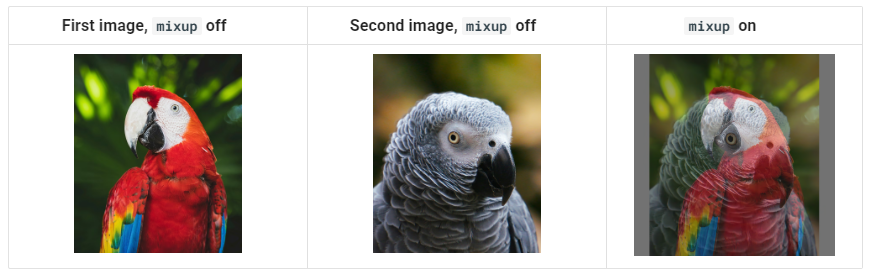

All the possible data augmentation methods can be found **[here](https://docs.ultralytics.com/guides/yolo-data-augmentation/#mixup-mixup)**

Experiment with different data augmentation parameters and create a new model that outperforms your model obtained from the `Train your own model` section. Validate your trained model on image `fd5d4d5a264922fe.jpg` and save the result.

In [ ]:
# default model
results = model.train(data="egg.yaml", epochs=10, imgsz=640)

**Question**: Why did you choose the augmentation parameters you selected? What effect did you observe on model performance when trying different combinations? Based on this experiment, what do you think is necessary to further improve the model (e.g., more data, different augmentations, other techniques)?